## Temperature Forecast Project - Code Summary

This notebook provides a comprehensive approach to predict the next day's maximum (`Next_Tmax`) and minimum temperatures (`Next_Tmin`) using meteorological and geographical features.

### Key Steps:

1. **Data Preprocessing**:
   - **Load Data**: Import the dataset from the provided URL.
   - **Check for Missing Values**: Inspect and handle any missing data.
   - **Feature and Target Separation**: Split the dataset into features (`X`) and target variables (`Next_Tmax` and `Next_Tmin`).
   - **Feature Scaling**: Standardize features using `StandardScaler`.

2. **Model Training and Evaluation**:
   - **Model Selection**: Train and evaluate multiple regression models:
     - Linear Regression
     - Random Forest Regression
     - Gradient Boosting Regression
     - XGBoost Regression
   - **Evaluation Metrics**: Calculate and display Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) for each model.

3. **Feature Importance**:
   - **Plot Importance**: Visualize feature importance for the Random Forest model to understand the influence of each feature on the predictions.

### Installation Notes:
- Ensure `xgboost` is installed. If not, install it using `pip install xgboost`.

This approach helps in identifying the best model for accurate temperature forecasting and understanding the impact of various features on the predictions.


In [1]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

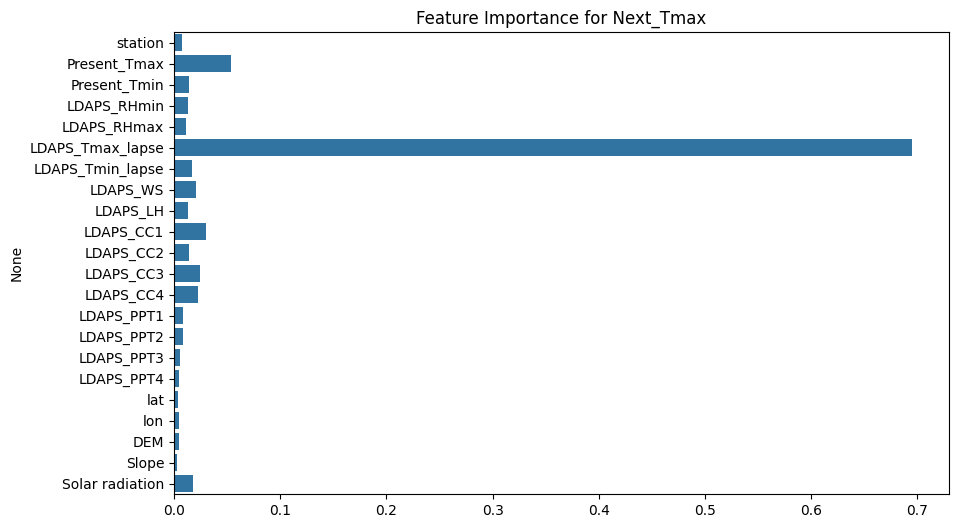

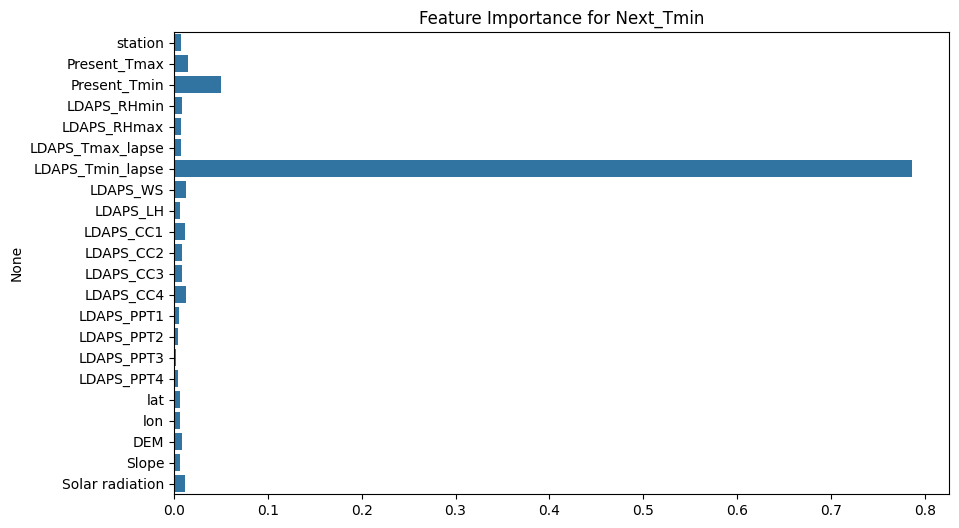

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv"
data = pd.read_csv(url)

# Inspect data structure
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Split data into features (X) and target variables (y)
X = data.drop(['Next_Tmax', 'Next_Tmin', 'Date'], axis=1)
y_max = data['Next_Tmax']
y_min = data['Next_Tmin']

# Train-test split for both target variables
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_max_scaled = scaler.fit_transform(X_train_max)
X_test_max_scaled = scaler.transform(X_test_max)
X_train_min_scaled = scaler.fit_transform(X_train_min)
X_test_min_scaled = scaler.transform(X_test_min)

# Model training function
def train_and_evaluate(model, X_train, y_train, X_test, y_test, target_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{target_name} Model Evaluation:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 40)

# Model Selection
# You can try different models by uncommenting each

# 1. Linear Regression
lr_model_max = LinearRegression()
train_and_evaluate(lr_model_max, X_train_max_scaled, y_train_max, X_test_max_scaled, y_test_max, 'Next_Tmax')

lr_model_min = LinearRegression()
train_and_evaluate(lr_model_min, X_train_min_scaled, y_train_min, X_test_min_scaled, y_test_min, 'Next_Tmin')

# 2. Random Forest
rf_model_max = RandomForestRegressor(n_estimators=100, random_state=42)
train_and_evaluate(rf_model_max, X_train_max_scaled, y_train_max, X_test_max_scaled, y_test_max, 'Next_Tmax')

rf_model_min = RandomForestRegressor(n_estimators=100, random_state=42)
train_and_evaluate(rf_model_min, X_train_min_scaled, y_train_min, X_test_min_scaled, y_test_min, 'Next_Tmin')

# 3. Gradient Boosting
gb_model_max = GradientBoostingRegressor(random_state=42)
train_and_evaluate(gb_model_max, X_train_max_scaled, y_train_max, X_test_max_scaled, y_test_max, 'Next_Tmax')

gb_model_min = GradientBoostingRegressor(random_state=42)
train_and_evaluate(gb_model_min, X_train_min_scaled, y_train_min, X_test_min_scaled, y_test_min, 'Next_Tmin')

# 4. XGBoost
xgb_model_max = XGBRegressor(random_state=42)
train_and_evaluate(xgb_model_max, X_train_max_scaled, y_train_max, X_test_max_scaled, y_test_max, 'Next_Tmax')

xgb_model_min = XGBRegressor(random_state=42)
train_and_evaluate(xgb_model_min, X_train_min_scaled, y_train_min, X_test_min_scaled, y_test_min, 'Next_Tmin')

# Plot feature importance for the best model (e.g., Random Forest)
def plot_feature_importance(model, X, title):
    feature_importance = model.feature_importances_
    features = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=features)
    plt.title(f'Feature Importance for {title}')
    plt.show()

plot_feature_importance(rf_model_max, X, 'Next_Tmax')
plot_feature_importance(rf_model_min, X, 'Next_Tmin')
